In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
import pandas as pd

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal length (cm)', ylabel='species'>

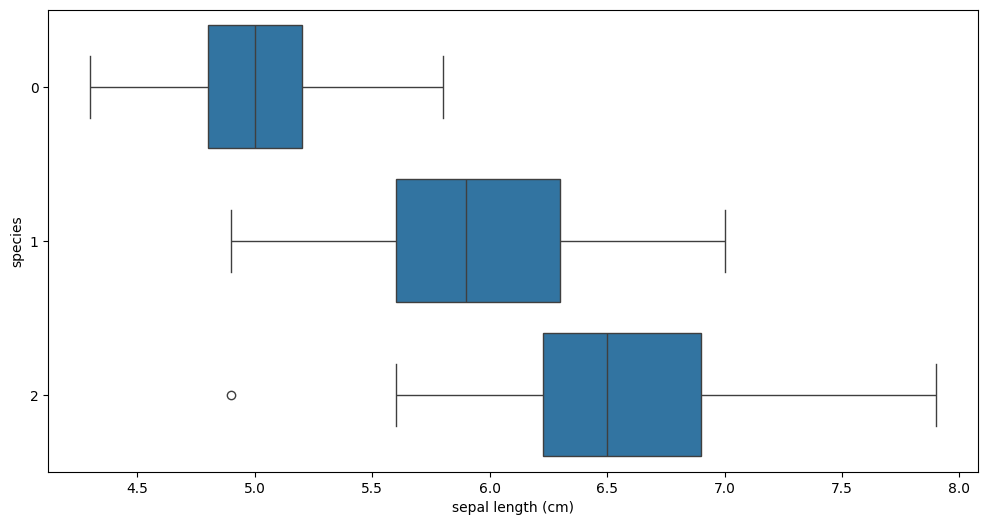

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='sepal length (cm)', y='species', data=iris_pd, orient='h')

<Axes: xlabel='sepal width (cm)', ylabel='species'>

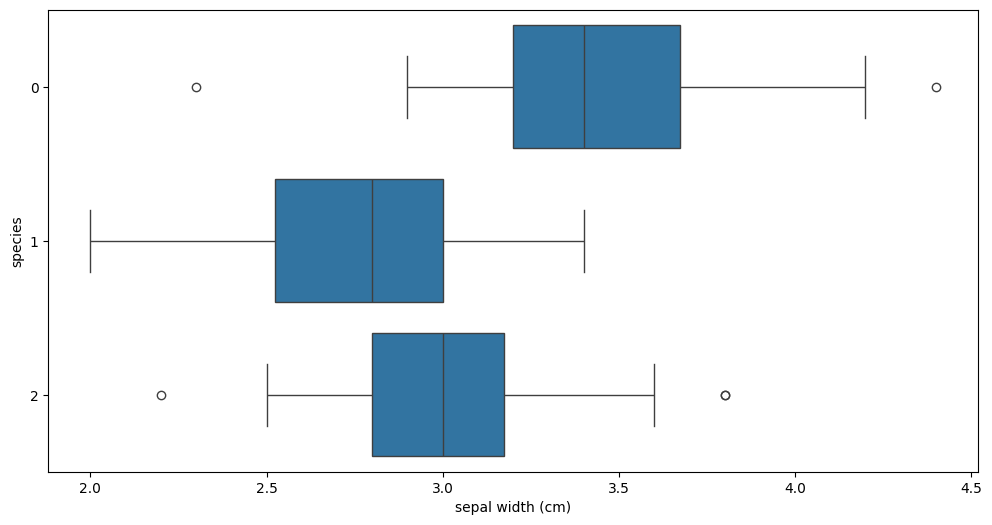

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='sepal width (cm)', y='species', data=iris_pd, orient='h')

<Axes: xlabel='petal length (cm)', ylabel='species'>

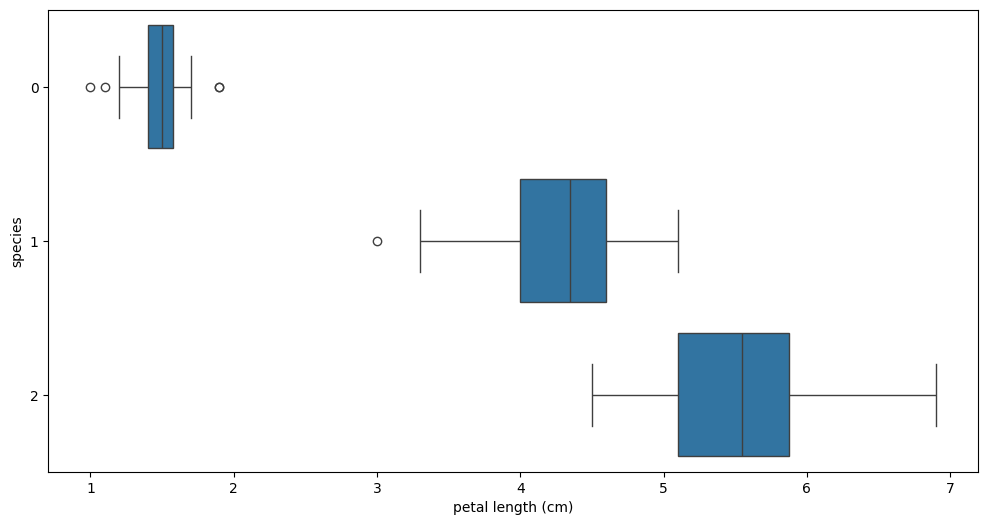

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='petal length (cm)', y='species', data=iris_pd, orient='h')

<Axes: xlabel='petal width (cm)', ylabel='species'>

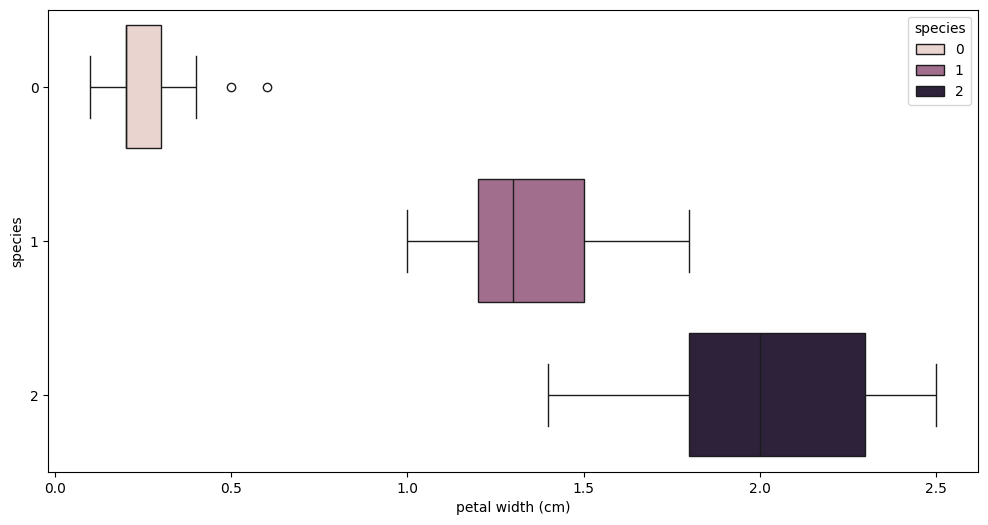

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='petal width (cm)', y='species', hue='species', data=iris_pd, orient='h')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

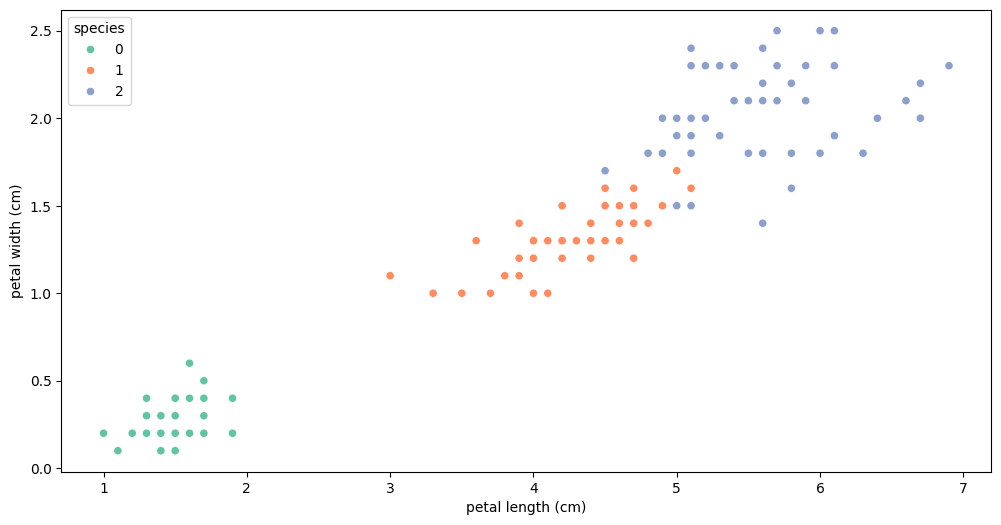

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_pd, hue='species', palette='Set2')

In [10]:
import numpy as np

-(10/16)*np.log2(10/16) - 6/16*np.log2(6/16)

np.float64(0.954434002924965)

In [11]:
1-(6/16)**2 - (10/16)**2

0.46875

In [12]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:, 2:], iris.target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)

0.9933333333333333

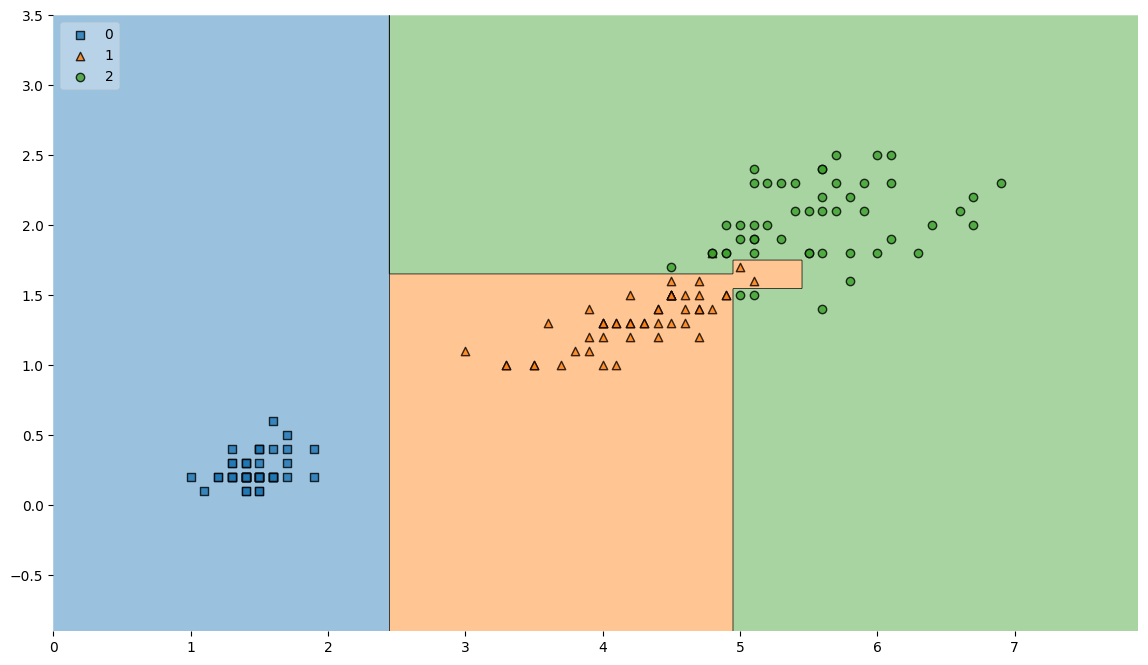

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=iris.data[:, 2:], y=iris.target, clf=iris_tree, legend=2)
plt.show()

In [15]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [16]:
a, b = zip(*pairs)

print(list(a))
print(list(b))

['a', 'b', 'c']
[1, 2, 3]


In [17]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

boston_pd = pd.read_csv('./data/housing.csv', skiprows=1, names=column_names, quotechar='"')

print(boston_pd.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [18]:
import plotly.express as px

fig = px.histogram(boston_pd, x="PRICE")
fig.show()

<Axes: >

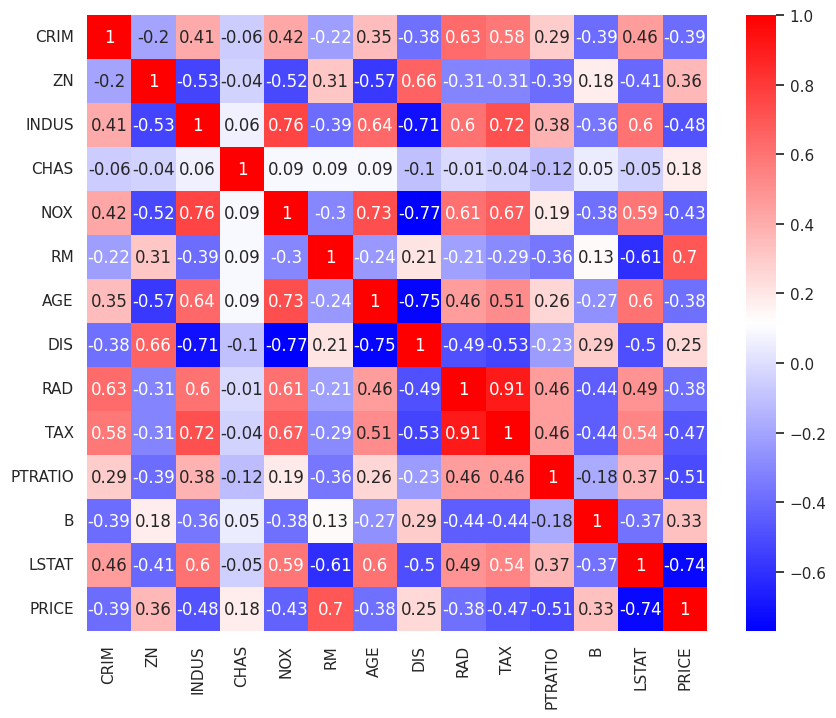

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

corr_mat = boston_pd.corr().round(2)
sns.set(rc={'figure.figsize': (10, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

<Axes: xlabel='LSTAT', ylabel='PRICE'>

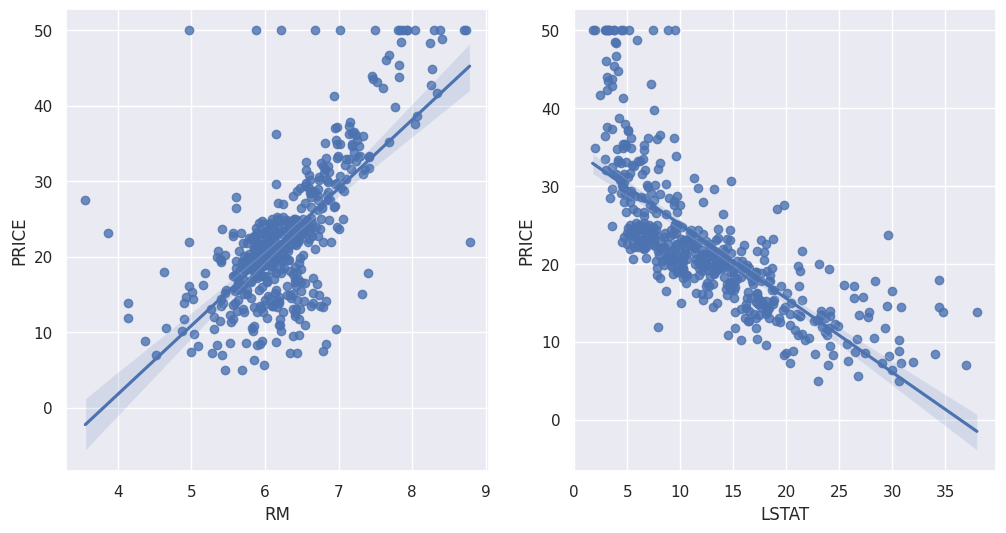

In [20]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize': (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x="RM", y="PRICE", data=boston_pd, ax=ax[0])
sns.regplot(x="LSTAT", y="PRICE", data=boston_pd, ax=ax[1])

In [21]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop("PRICE", axis=1)
y = boston_pd["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print(rmse_tr)
print(rmse_test)

4.642806069019823
4.931352584146701


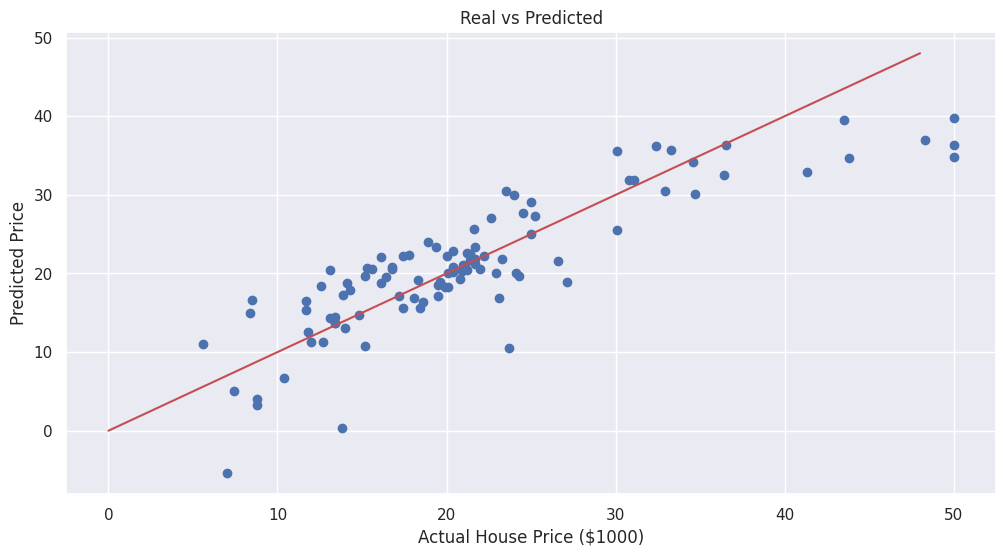

In [24]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Price ($1000)")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

In [25]:
X = boston_pd.drop(["PRICE", "LSTAT"], axis=1)
y = boston_pd["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print(rmse_tr)
print(rmse_test)

5.165137874244864
5.295595032597169


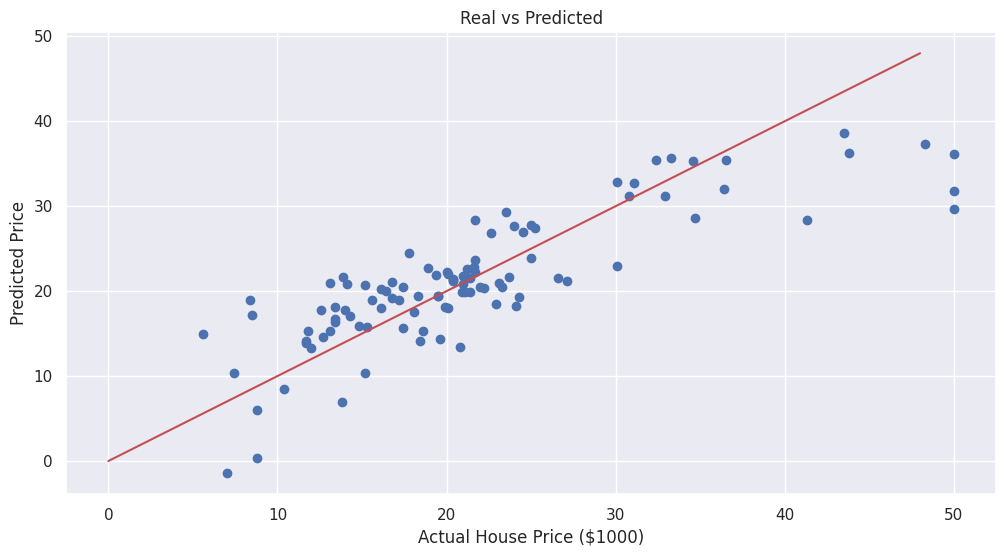

In [27]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Price ($1000)")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

In [28]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=";")
white_wine = pd.read_csv(white_url, sep=";")

In [29]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [32]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [33]:
import plotly.express as px

fig = px.histogram(wine, x="quality")
fig.show()

In [34]:
fig = px.histogram(wine, x="quality", color="color")
fig.show()

In [35]:
X = wine.drop(["color"], axis=1)
y= wine["color"]


from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

In [36]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train["quality"], name="Train"))
fig.add_trace(go.Histogram(x=X_test["quality"], name="Test"))

fig.update_layout(barmode="overlay")
fig.update_traces(opacity=0.75)

fig.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,13
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9553588608812776
0.9569230769230769


In [39]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='qualilty'))

fig.show()




In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [41]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd["fixed acidity"], name="fixed acidity"))
fig.add_trace(go.Box(y=X_mms_pd["chlorides"], name="chlorides"))
fig.add_trace(go.Box(y=X_mms_pd["quality"], name="quality"))

fig.show()

In [42]:
fig = go.Figure()

fig.add_trace(go.Box(y=X_ss_pd["fixed acidity"], name="fixed acidity"))
fig.add_trace(go.Box(y=X_ss_pd["chlorides"], name="chlorides"))
fig.add_trace(go.Box(y=X_ss_pd["quality"], name="quality"))

fig.show()


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)


y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9553588608812776
0.9569230769230769


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)


y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9553588608812776
0.9569230769230769


In [45]:
from graphviz import Source

from sklearn.tree import export_graphviz


Source(export_graphviz(wine_tree, feature_names=X_train.columns, class_names=["W", "R"], rounded=True, filled=True))


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [46]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': np.float64(0.0),
 'volatile acidity': np.float64(0.0),
 'citric acid': np.float64(0.0),
 'residual sugar': np.float64(0.0),
 'chlorides': np.float64(0.24230360549660776),
 'free sulfur dioxide': np.float64(0.0),
 'total sulfur dioxide': np.float64(0.7576963945033922),
 'density': np.float64(0.0),
 'pH': np.float64(0.0),
 'sulphates': np.float64(0.0),
 'alcohol': np.float64(0.0),
 'quality': np.float64(0.0)}

In [47]:
wine["taste"] = [1. if grade > 5 else 0. for grade in wine["quality"]]

wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
 13  taste                 6497 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 761.4 KB


In [48]:
X = wine.drop(["taste"], axis=1)
y = wine["taste"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))




1.0
1.0


In [49]:
X = wine.drop(["taste", "quality"], axis=1)
y = wine["taste"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))


0.7294593034442948
0.7161538461538461


In [54]:
import pandas as pd

df = pd.DataFrame({
    "A" : ["a", "b", "c", "a", "b"],
    "B" : [1, 2, 3, 1, 0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["A"])

LabelEncoder()

In [56]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [57]:
df["le_A"] = le.transform(df["A"])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [58]:
le.transform(["a", "b"])

array([0, 1])

In [59]:
le.fit_transform(df["A"])

array([0, 1, 2, 0, 1])

In [61]:
le.inverse_transform([1,2,2,0])

array(['b', 'c', 'c', 'a'], dtype=object)

In [62]:
df = pd.DataFrame ({
    "A" : [10, 20, -10, -10, 25],
    "B" : [1, 2, 3, 0, 1]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,-10,0
4,25,1


In [63]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [64]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [65]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 0.33333333]])

In [66]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [-10.,   0.],
       [ 25.,   1.]])

In [67]:
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 0.33333333]])

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

,copy,True
,with_mean,True
,with_std,True


In [71]:
ss.mean_, ss.scale_

(array([7. , 1.4]), array([14.69693846,  1.0198039 ]))

In [73]:
df_ss = ss.transform(df)
df_ss

array([[ 0.20412415, -0.39223227],
       [ 0.88453796,  0.58834841],
       [-1.15670349,  1.56892908],
       [-1.15670349, -1.37281295],
       [ 1.22474487, -0.39223227]])

In [74]:
ss.fit_transform(df)

array([[ 0.20412415, -0.39223227],
       [ 0.88453796,  0.58834841],
       [-1.15670349,  1.56892908],
       [-1.15670349, -1.37281295],
       [ 1.22474487, -0.39223227]])

In [75]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [-10.,   0.],
       [ 25.,   1.]])

In [78]:
df1 = pd.DataFrame({
    "A" : [-0.1, 0, 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df1_scaler = df1.copy()

In [81]:
df1_scaler["MinMaxScaler"] = mm.fit_transform(df1)
df1_scaler["StandardScaler"] = ss.fit_transform(df1)
df1_scaler["RobustScaler"] = rs.fit_transform(df1)

df1_scaler

,A,MinMaxScaler,StandardScaler,RobustScaler
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


<Axes: >

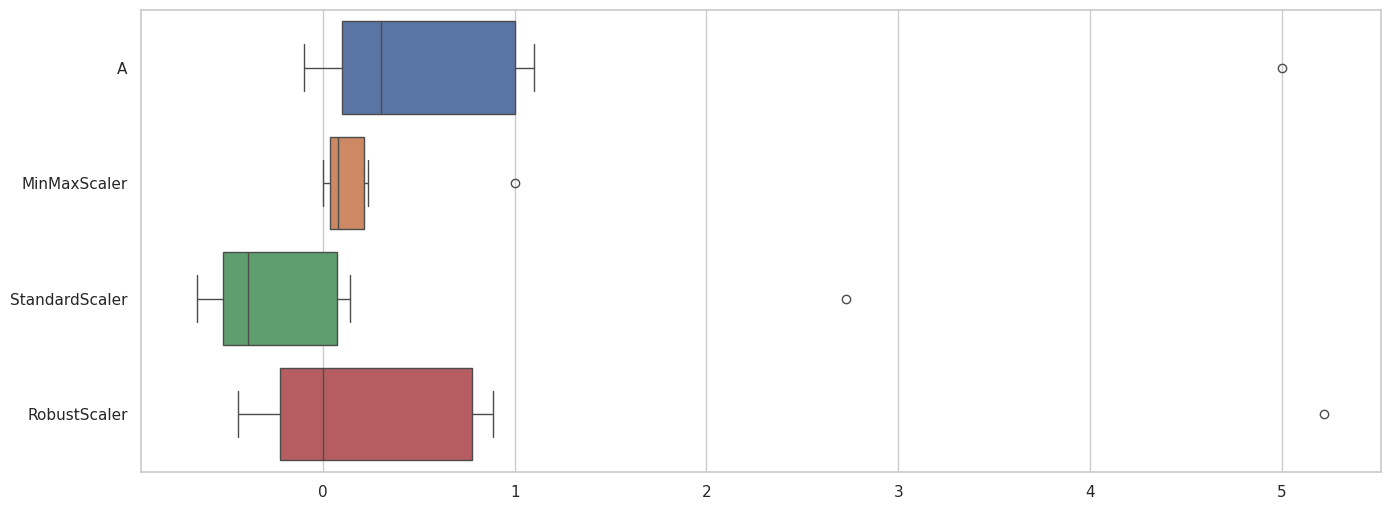

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(data=df1_scaler, orient="h")

In [83]:
import pandas as pd 

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=";")
white_wine = pd.read_csv(white_url, sep=";")

red_wine["color"] = 1
white_wine["color"] = 0

wine = pd.concat([red_wine, white_wine])
wine["taste"] = [1 if grade>5 else 0 for grade in wine["quality"]]

X = wine.drop(["taste", "quality"], axis = 1)
y = wine["taste"]

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.7294593034442948
0.7161538461538461


In [85]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print(accuracy_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test))

0.7161538461538461
0.7314702308626975
0.8026666666666666
0.7105988470875331
0.7654164017800381


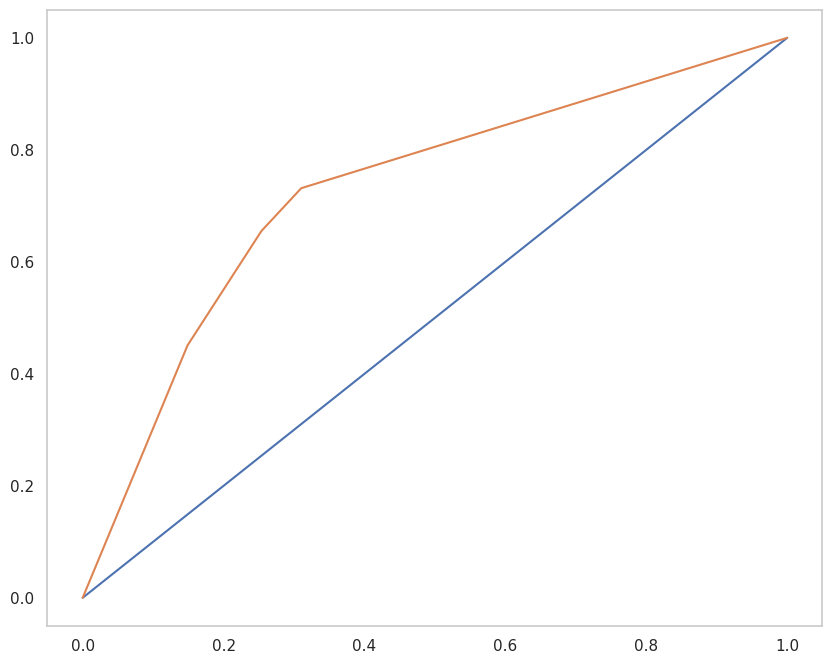

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, threholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0, 1],[0, 1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()